### ¿Qué combinaciones de características demográficas (como edad, nivel educativo y ocupación) son más comunes entre los clientes que utilizan múltiples productos financieros del banco: préstamo, hipoteca, depósito?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importamos la vista con las variables que nos interesan para esta pregunta

df_cliente = pd.read_csv("perfil_cliente.csv", delimiter=";")

df_cliente

,age,job,marital,education,balance,housing,loan,deposit
0,59,admin,married,secondary,2343,yes,no,yes
1,59,admin,married,secondary,2343,yes,no,yes
2,56,admin,married,secondary,45,no,no,yes
3,41,technician,married,secondary,1270,yes,no,yes
4,55,services,married,secondary,2476,yes,no,yes
...,...,...,...,...,...,...,...,...
25986,80,retired,married,secondary,173,no,no,no
25987,52,blue-collar,married,primary,1271,no,no,no
25988,65,retired,married,primary,276,no,no,yes
25989,39,admin,married,secondary,1221,no,no,no


In [4]:
# Traducimos los valores del dataset y reconfiguramos las variables de productos a 1 y 0

conditions = [
    (df_cliente["job"] == "admin"),
    (df_cliente["job"] == "technician"),
    (df_cliente["job"] == "unemployed"),
    (df_cliente["job"] == "self-employed"),
    (df_cliente["job"] == "retired"),
    (df_cliente["job"] == "student"),
    (df_cliente["job"] == "blue-collar"),
    (df_cliente["job"] == "management"),
    (df_cliente["job"] == "services"),
    (df_cliente["job"] == "entrepreneur"),
    (df_cliente["job"] == "housemaid")
]

values = ["administrativo", "técnico", "desempleado", "autónomo", 
          "jubilado", "estudiante", "obrero", "manager", "servicios", "emprendedor", "empleado doméstico"]

df_cliente["job"] = np.select(conditions, values)


df_cliente["marital"] = np.where(df_cliente["marital"] == "married", "casado",
                                np.where(df_cliente["marital"] == "single", "soltero",
                                         "divorciado"))

df_cliente["education"] = np.where(df_cliente["education"] == "primary", "primaria",
                                np.where(df_cliente["education"] == "secondary", "secundaria",
                                         "terciaria"))

df_cliente["housing"] = np.where(df_cliente["housing"] == "no", 0, 1)

df_cliente["loan"] = np.where(df_cliente["loan"] == "no", 0, 1)

df_cliente["deposit"] = np.where(df_cliente["deposit"] == "no", 0, 1)


# Y los títulos

df_cliente = df_cliente.rename(columns={"age": "edad", 
                                        "job": "trabajo", 
                                        "marital": "estado civil", 
                                        "education": "educación",
                                        "housing": "hipoteca",
                                        "loan": "préstamo",
                                        "deposit": "depósito"})

df_cliente

,edad,trabajo,estado civil,educación,balance,hipoteca,préstamo,depósito
0,59,administrativo,casado,secundaria,2343,1,0,1
1,59,administrativo,casado,secundaria,2343,1,0,1
2,56,administrativo,casado,secundaria,45,0,0,1
3,41,técnico,casado,secundaria,1270,1,0,1
4,55,servicios,casado,secundaria,2476,1,0,1
...,...,...,...,...,...,...,...,...
25986,80,jubilado,casado,secundaria,173,0,0,0
25987,52,obrero,casado,primaria,1271,0,0,0
25988,65,jubilado,casado,primaria,276,0,0,1
25989,39,administrativo,casado,secundaria,1221,0,0,0


In [5]:
# Confirmamos que no hay valores nulos

(df_cliente.isna().sum() / df_cliente.shape[0] * 100).round(2)


edad            0.0
trabajo         0.0
estado civil    0.0
educación       0.0
balance         0.0
hipoteca        0.0
préstamo        0.0
depósito        0.0
dtype: float64

In [6]:
# Tipos de datos
df_cliente.dtypes

edad             int64
trabajo         object
estado civil    object
educación       object
balance          int64
hipoteca         int32
préstamo         int32
depósito         int32
dtype: object

##### Vamos a convertir las variables numéricas en categóricas

##### Dividiremos balance en tres grupos:

* **Negativo:** menores a 0
* **Normal:** entre 0 y el percentil 75
* **Alto:** mayor al percentil 75

In [7]:
# Reconfiguramos la variable edad

conditions = [
    (df_cliente["edad"] < 30),
    (df_cliente["edad"] >= 30) & (df_cliente["edad"] < 40),
    (df_cliente["edad"] >= 40) & (df_cliente["edad"] < 50),
    (df_cliente["edad"] >= 50) & (df_cliente["edad"] < 60),
    (df_cliente["edad"] >= 60) & (df_cliente["edad"] < 70),
    (df_cliente["edad"] >= 70) & (df_cliente["edad"] < 80),
    (df_cliente["edad"] >= 80)
]

values = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

df_cliente["edad"] = np.select(conditions, values)

# Y también balance

percentil_75 = df_cliente["balance"].quantile(0.75)

conditions = [
    (df_cliente["balance"] < 0),
    (df_cliente["balance"] >= 0) & (df_cliente["balance"] <= percentil_75),
    (df_cliente["balance"] > percentil_75)
]

values = ["negativo", "normal", "alto"]

df_cliente["balance"] = np.select(conditions, values)

df_cliente


,edad,trabajo,estado civil,educación,balance,hipoteca,préstamo,depósito
0,50-59,administrativo,casado,secundaria,alto,1,0,1
1,50-59,administrativo,casado,secundaria,alto,1,0,1
2,50-59,administrativo,casado,secundaria,normal,0,0,1
3,40-49,técnico,casado,secundaria,normal,1,0,1
4,50-59,servicios,casado,secundaria,alto,1,0,1
...,...,...,...,...,...,...,...,...
25986,80+,jubilado,casado,secundaria,normal,0,0,0
25987,50-59,obrero,casado,primaria,normal,0,0,0
25988,60-69,jubilado,casado,primaria,normal,0,0,1
25989,30-39,administrativo,casado,secundaria,normal,0,0,0


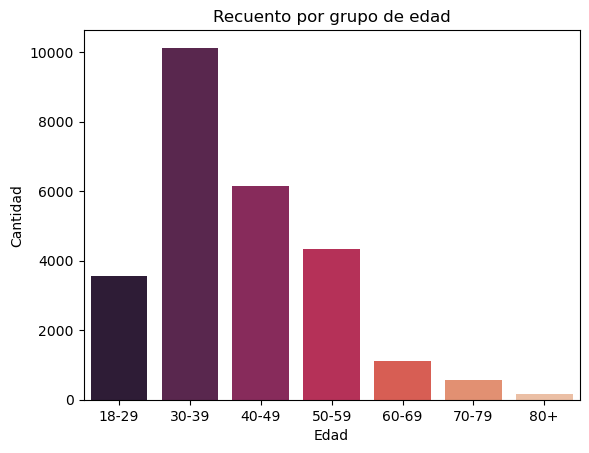

In [8]:
g = sns.barplot(data=df_cliente["edad"].value_counts().reset_index(),
              x="edad",
              y="count",
              palette= "rocket",
              order= ["18-29",
                      "30-39",
                      "40-49",
                      "50-59",
                      "60-69",
                      "70-79",
                      "80+"])

g.set(xlabel="Edad", ylabel="Cantidad")
g.set_title("Recuento por grupo de edad");

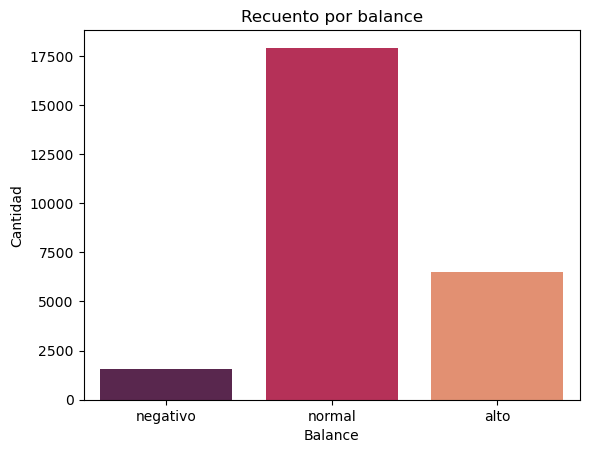

In [9]:
g = sns.barplot(data=df_cliente["balance"].value_counts().reset_index(),
              x="balance",
              y="count",
              palette= "rocket",
              order= ["negativo",
                      "normal",
                      "alto"])

g.set(xlabel="Balance", ylabel="Cantidad")
g.set_title("Recuento por balance");

#### Creamos una nueva variable con la cantidad de productos por cliente. Para poder hacer esto, vamos a reconfigurar las variables de productos financieros a 1 y 0.

In [10]:
df_cliente["productos"] = df_cliente["hipoteca"] + df_cliente["préstamo"] + df_cliente["depósito"]

df_cliente["productos"].value_counts().reset_index().sort_values(by="productos").set_index("productos")

,count
productos,
0,4898
1,14679
2,5811
3,603


In [11]:
# Vemos los clientes que tienen contratados más de 2 productos

clientes_multiples_productos = df_cliente[df_cliente["productos"] >= 2]

clientes_agrupados = clientes_multiples_productos.groupby(["edad", "trabajo", "estado civil", "educación", "balance"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)
totales_por_grupo = df_cliente.groupby(["edad", "trabajo", "estado civil", "educación", "balance"])\
                                                .size()\
                                                .reset_index(name="total grupo")

clientes_agrupados = clientes_agrupados.merge(totales_por_grupo, on=["edad", "trabajo", "estado civil", "educación", "balance"])

clientes_agrupados["porcentaje clientes"] = round((clientes_agrupados["clientes múltiples productos"] / clientes_agrupados["total grupo"]) * 100, 2)

clientes_agrupados = clientes_agrupados.sort_values(by="clientes múltiples productos", ascending=False)

clientes_agrupados


,edad,trabajo,estado civil,educación,balance,clientes múltiples productos,total grupo,porcentaje clientes
0,30-39,obrero,casado,secundaria,normal,243,541,44.92
1,30-39,manager,casado,terciaria,normal,218,909,23.98
2,30-39,manager,soltero,terciaria,normal,172,767,22.43
3,40-49,obrero,casado,secundaria,normal,142,389,36.50
4,30-39,técnico,casado,secundaria,normal,139,466,29.83
...,...,...,...,...,...,...,...,...
453,18-29,técnico,casado,secundaria,alto,1,5,20.00
454,40-49,servicios,casado,terciaria,negativo,1,1,100.00
455,50-59,autónomo,soltero,terciaria,normal,1,1,100.00
456,30-39,administrativo,casado,terciaria,alto,1,16,6.25


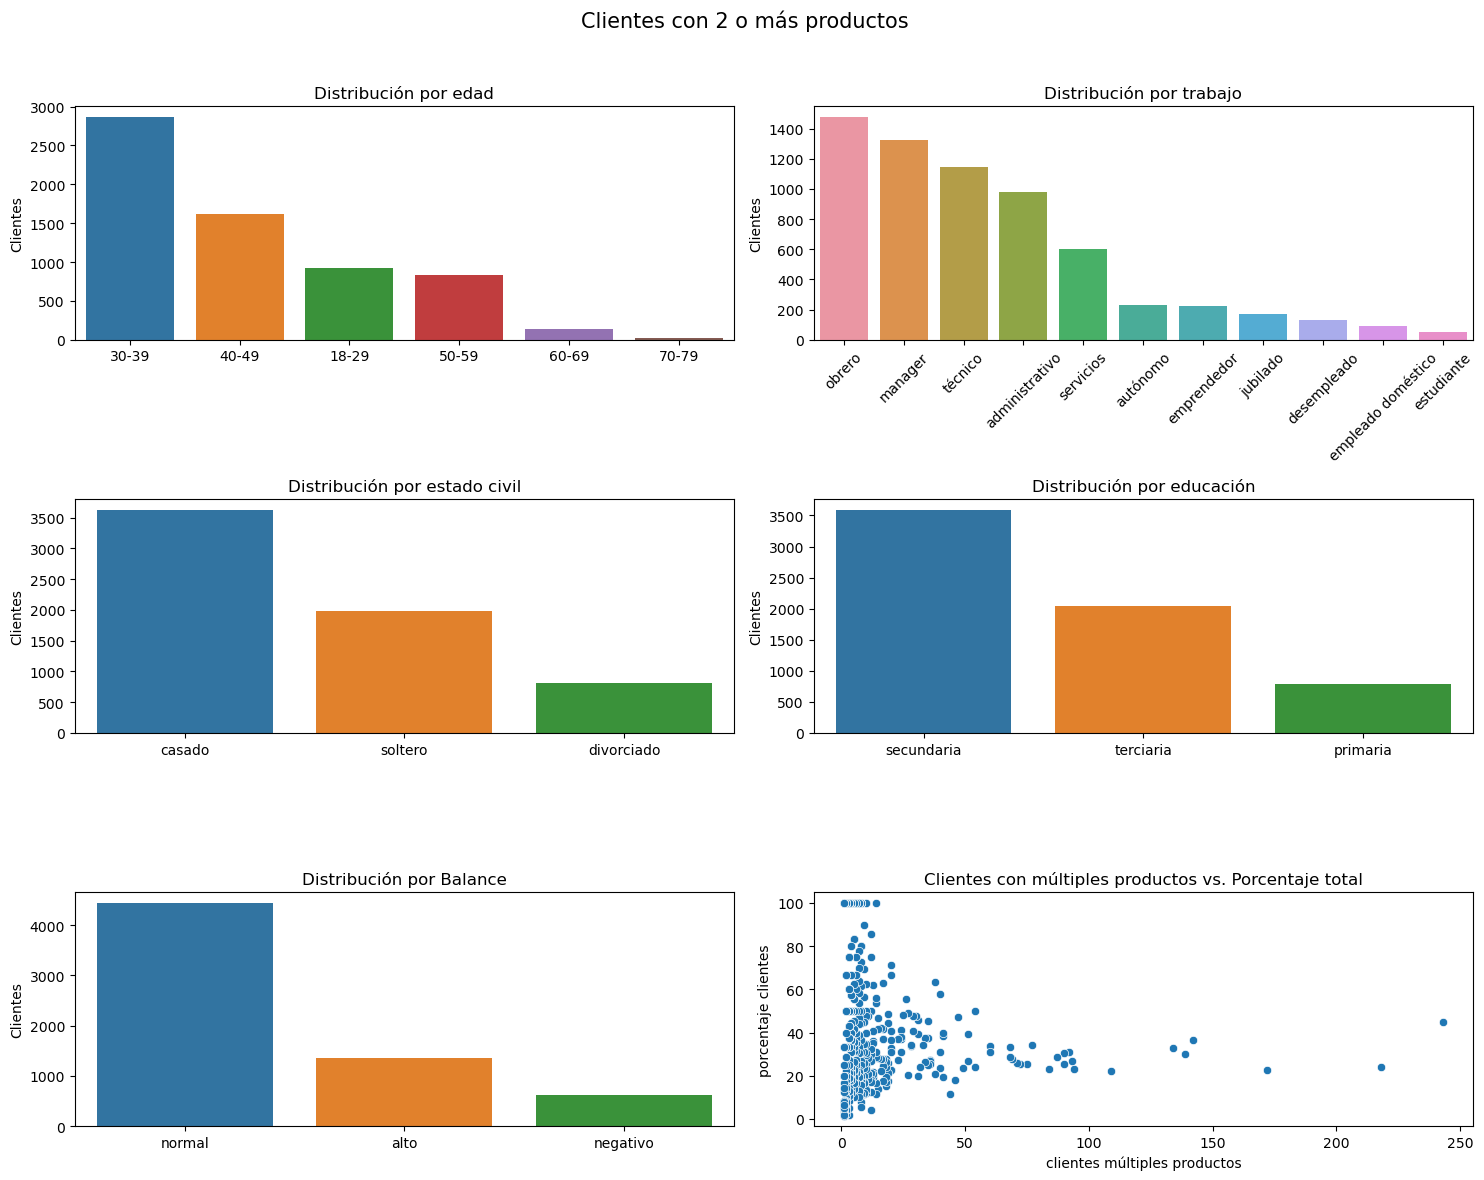

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Clientes con 2 o más productos", fontsize=15)

# Distribución por edad
sns.countplot(x="edad", data=clientes_multiples_productos, ax=axes[0, 0],
              order= clientes_multiples_productos["edad"].value_counts().index)
axes[0, 0].set_title("Distribución por edad")
axes[0, 0].set_ylabel("Clientes")
axes[0, 0].set_xlabel(None)

# Distribución por trabajo

sns.countplot(x="trabajo", data=clientes_multiples_productos, ax=axes[0, 1], 
              order= clientes_multiples_productos["trabajo"].value_counts().index)
axes[0, 1].set_title("Distribución por trabajo")
axes[0, 1].set_ylabel("Clientes")
axes[0, 1].set_xlabel(None)
axes[0, 1].tick_params(axis="x", rotation=45)

# Distribución por estado civil
sns.countplot(x="estado civil", data=clientes_multiples_productos, ax=axes[1, 0],
              order= clientes_multiples_productos["estado civil"].value_counts().index)
axes[1, 0].set_title("Distribución por estado civil")
axes[1, 0].set_ylabel("Clientes")
axes[1, 0].set_xlabel(None)

# Distribución por educación
sns.countplot(x="educación", data=clientes_multiples_productos, ax=axes[1, 1],
              order= clientes_multiples_productos["educación"].value_counts().index)
axes[1, 1].set_title("Distribución por educación")
axes[1, 1].set_ylabel("Clientes")
axes[1, 1].set_xlabel(None)

# Distribución por balance
sns.countplot(x="balance", data=clientes_multiples_productos, ax=axes[2, 0],
              order= clientes_multiples_productos["balance"].value_counts().index)
axes[2, 0].set_title("Distribución por Balance")
axes[2, 0].set_ylabel("Clientes")
axes[2, 0].set_xlabel(None)

# Clientes vs. % total
sns.scatterplot(data=clientes_agrupados,
                    x="clientes múltiples productos",
                    y="porcentaje clientes",
                    ax=axes[2, 1])
axes[2,1].set_title("Clientes con múltiples productos vs. Porcentaje total")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

#### Profundizamos por edad 30-39

In [13]:
age30_39 = df_cliente[(df_cliente["productos"] >= 2) & (df_cliente["edad"] == "30-39")]

age30_39_agrupados = age30_39.groupby(["trabajo", "estado civil", "educación", "balance"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)

totales_30_39 = df_cliente[df_cliente["edad"] == "30-39"].groupby(["trabajo", "estado civil", "educación", "balance"])\
                                                .size()\
                                                .reset_index(name="total grupo")

age30_39_agrupados = age30_39_agrupados.merge(totales_30_39, on=["trabajo", "estado civil", "educación", "balance"])

age30_39_agrupados["porcentaje clientes"] = round((age30_39_agrupados["clientes múltiples productos"] / age30_39_agrupados["total grupo"]) * 100, 2)

age30_39_agrupados = age30_39_agrupados.sort_values(by="clientes múltiples productos", ascending=False)

age30_39_agrupados.head(20)

,trabajo,estado civil,educación,balance,clientes múltiples productos,total grupo,porcentaje clientes
0,obrero,casado,secundaria,normal,243,541,44.92
1,manager,casado,terciaria,normal,218,909,23.98
2,manager,soltero,terciaria,normal,172,767,22.43
3,técnico,casado,secundaria,normal,139,466,29.83
4,administrativo,casado,secundaria,normal,134,410,32.68
5,técnico,soltero,secundaria,normal,94,405,23.21
6,servicios,casado,secundaria,normal,93,344,27.03
7,administrativo,soltero,secundaria,normal,92,295,31.19
8,manager,soltero,terciaria,alto,84,360,23.33
9,técnico,soltero,terciaria,normal,72,284,25.35


#### Visualizamos edad 30-39 vs. trabajo

In [14]:
df_trabajo_30_39 = age30_39.groupby("trabajo")\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)

totales_30_39 = df_cliente[df_cliente["edad"] == "30-39"].groupby(["trabajo"])\
                                                .size()\
                                                .reset_index(name="total grupo")

df_trabajo_30_39 = df_trabajo_30_39.merge(totales_30_39, on=["trabajo"])

df_trabajo_30_39["porcentaje clientes"] = round((df_trabajo_30_39["clientes múltiples productos"] / df_trabajo_30_39["total grupo"]) * 100, 2)

df_trabajo_30_39 = df_trabajo_30_39.sort_values(by="clientes múltiples productos", ascending=False)

df_trabajo_30_39


,trabajo,clientes múltiples productos,total grupo,porcentaje clientes
0,manager,691,2767,24.97
1,obrero,660,1766,37.37
2,técnico,547,2082,26.27
3,administrativo,423,1274,33.20
4,servicios,269,968,27.79
5,emprendedor,93,283,32.86
6,autónomo,87,396,21.97
7,desempleado,50,284,17.61
8,empleado doméstico,32,148,21.62
9,estudiante,14,150,9.33


C:\Users\damim\AppData\Local\Temp\ipykernel_8504\4249740379.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trabajos, rotation=45)


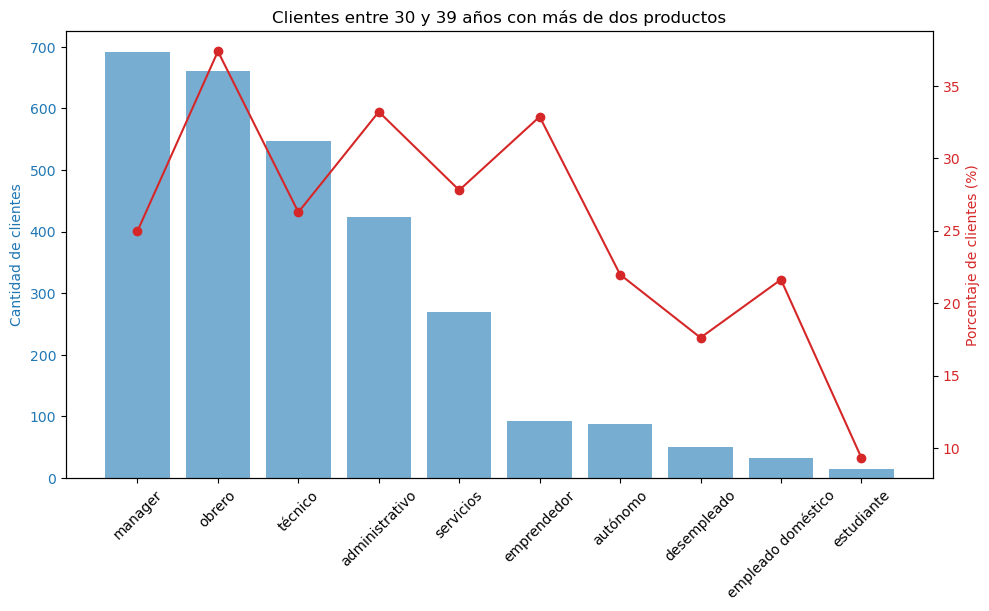

In [15]:
trabajos = df_trabajo_30_39["trabajo"]

fig, ax1= plt.subplots(figsize=(10,6))

ax1.set_xlabel(None)
ax1.set_ylabel("Cantidad de clientes", color="tab:blue")
ax1.bar(trabajos, df_trabajo_30_39["clientes múltiples productos"], color="tab:blue", alpha=0.6)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticklabels(trabajos, rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel("Porcentaje de clientes (%)", color="tab:red")
ax2.plot(trabajos, df_trabajo_30_39["porcentaje clientes"], color="tab:red", marker="o")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.tight_layout()
plt.title("Clientes entre 30 y 39 años con más de dos productos")
plt.show()

#### Visualizamos edad 30-39 vs. trabajo vs. estado civil

In [16]:
df_trabajo_estado_civil_30_39 = age30_39.groupby(["trabajo", "estado civil"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)

totales_30_39 = df_cliente[df_cliente["edad"] == "30-39"].groupby(["trabajo", "estado civil"])\
                                                .size()\
                                                .reset_index(name="total grupo")

df_trabajo_estado_civil_30_39 = df_trabajo_estado_civil_30_39.merge(totales_30_39, on=["trabajo", "estado civil"])

df_trabajo_estado_civil_30_39["porcentaje clientes"] = round((df_trabajo_estado_civil_30_39["clientes múltiples productos"] / df_trabajo_estado_civil_30_39["total grupo"]) * 100, 2)

df_trabajo_estado_civil_30_39 = df_trabajo_estado_civil_30_39.sort_values(by="clientes múltiples productos", ascending=False)

df_trabajo_estado_civil_30_39

,trabajo,estado civil,clientes múltiples productos,total grupo,porcentaje clientes
0,obrero,casado,459,1170,39.23
1,manager,casado,338,1350,25.04
2,manager,soltero,283,1217,23.25
3,técnico,casado,265,955,27.75
4,técnico,soltero,234,970,24.12
5,administrativo,casado,211,621,33.98
6,administrativo,soltero,154,512,30.08
7,servicios,casado,152,539,28.20
8,obrero,soltero,145,465,31.18
9,servicios,soltero,84,341,24.63


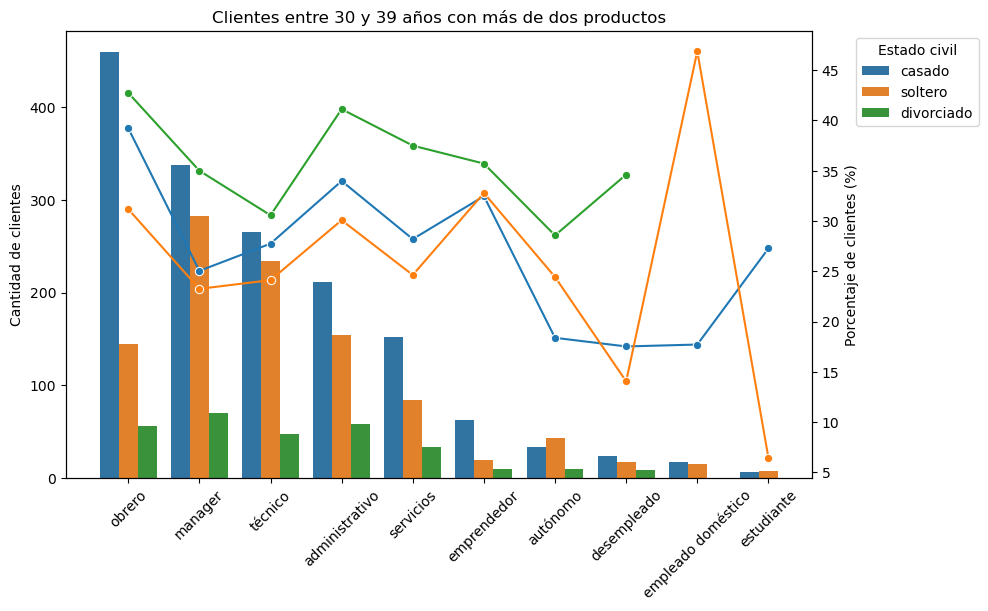

In [17]:
fig, ax1= plt.subplots(figsize=(10,6))

sns.barplot(
        data=df_trabajo_estado_civil_30_39,
        x="trabajo",
        y="clientes múltiples productos",
        hue="estado civil",
        ax=ax1,
        errorbar=None
)
ax1.set_ylabel("Cantidad de clientes")
ax1.set_xlabel(None)
ax1.set_xticklabels(df_trabajo_estado_civil_30_39["trabajo"].unique(), rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel("Porcentaje de clientes (%)")

sns.lineplot(
    data=df_trabajo_estado_civil_30_39, 
    x="trabajo", 
    y="porcentaje clientes", 
    hue="estado civil",
    legend=None, 
    marker="o", 
    ax=ax2
)

ax1.legend(title="Estado civil", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.title("Clientes entre 30 y 39 años con más de dos productos")
plt.show()

#### Visualizamos edad 30-39 vs. trabajo vs. educación

In [18]:
df_trabajo_educacion_30_39 = age30_39.groupby(["trabajo", "educación"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)

totales_30_39 = df_cliente[df_cliente["edad"] == "30-39"].groupby(["trabajo", "educación"])\
                                                .size()\
                                                .reset_index(name="total grupo")

df_trabajo_educacion_30_39 = df_trabajo_educacion_30_39.merge(totales_30_39, on=["trabajo", "educación"])

df_trabajo_educacion_30_39["porcentaje clientes"] = round((df_trabajo_educacion_30_39["clientes múltiples productos"] / df_trabajo_educacion_30_39["total grupo"]) * 100, 2)

df_trabajo_educacion_30_39 = df_trabajo_educacion_30_39.sort_values(by="clientes múltiples productos", ascending=False)

df_trabajo_educacion_30_39

,trabajo,educación,clientes múltiples productos,total grupo,porcentaje clientes
0,manager,terciaria,633,2579,24.54
1,obrero,secundaria,463,1166,39.71
2,técnico,secundaria,371,1348,27.52
3,administrativo,secundaria,355,1022,34.74
4,servicios,secundaria,248,821,30.21
5,técnico,terciaria,169,706,23.94
6,obrero,primaria,169,489,34.56
7,administrativo,terciaria,60,229,26.20
8,autónomo,terciaria,58,249,23.29
9,manager,secundaria,56,168,33.33


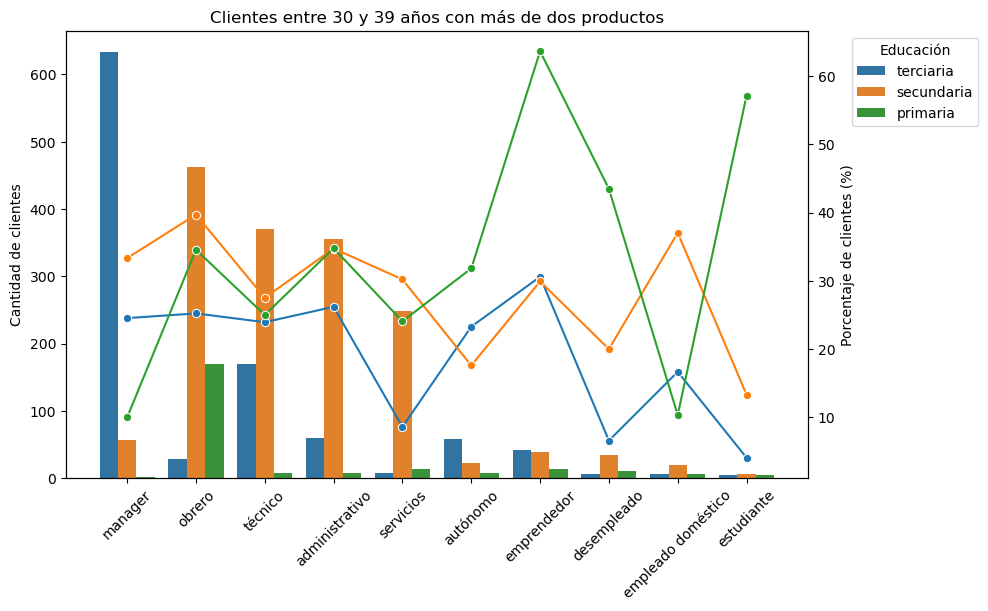

In [19]:
fig, ax1= plt.subplots(figsize=(10,6))

sns.barplot(
        data=df_trabajo_educacion_30_39,
        x="trabajo",
        y="clientes múltiples productos",
        hue="educación",
        ax=ax1,
        errorbar=None
)
ax1.set_ylabel("Cantidad de clientes")
ax1.set_xlabel(None)
ax1.set_xticklabels(df_trabajo_educacion_30_39["trabajo"].unique(), rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel("Porcentaje de clientes (%)")

sns.lineplot(
    data=df_trabajo_educacion_30_39, 
    x="trabajo", 
    y="porcentaje clientes", 
    hue="educación",
    legend=None, 
    marker="o", 
    ax=ax2
)

ax1.legend(title="Educación", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.title("Clientes entre 30 y 39 años con más de dos productos")
plt.show()

#### Visualizamos edad 30-39 vs. trabajo vs. balance

In [20]:
df_trabajo_balance_30_39 = age30_39.groupby(["trabajo", "balance"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)

totales_30_39 = df_cliente[df_cliente["edad"] == "30-39"].groupby(["trabajo", "balance"])\
                                                .size()\
                                                .reset_index(name="total grupo")

df_trabajo_balance_30_39 = df_trabajo_balance_30_39.merge(totales_30_39, on=["trabajo", "balance"])

df_trabajo_balance_30_39["porcentaje clientes"] = round((df_trabajo_balance_30_39["clientes múltiples productos"] / df_trabajo_balance_30_39["total grupo"]) * 100, 2)

df_trabajo_balance_30_39 = df_trabajo_balance_30_39.sort_values(by="clientes múltiples productos", ascending=False)

df_trabajo_balance_30_39

,trabajo,balance,clientes múltiples productos,total grupo,porcentaje clientes
0,manager,normal,469,1939,24.19
1,obrero,normal,466,1251,37.25
2,técnico,normal,399,1499,26.62
3,administrativo,normal,338,1002,33.73
4,manager,alto,193,724,26.66
5,servicios,normal,175,695,25.18
6,técnico,alto,115,494,23.28
7,obrero,alto,110,341,32.26
8,obrero,negativo,84,174,48.28
9,servicios,alto,60,186,32.26


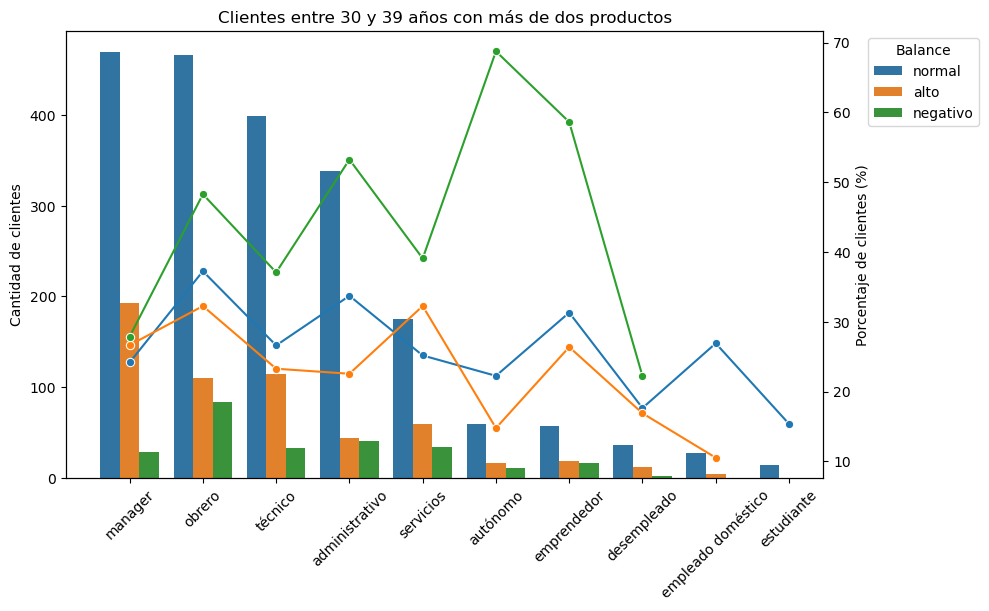

In [21]:
fig, ax1= plt.subplots(figsize=(10,6))

sns.barplot(
        data=df_trabajo_balance_30_39,
        x="trabajo",
        y="clientes múltiples productos",
        hue="balance",
        ax=ax1,
        errorbar=None
)
ax1.set_ylabel("Cantidad de clientes")
ax1.set_xlabel(None)
ax1.set_xticklabels(df_trabajo_balance_30_39["trabajo"].unique(), rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel("Porcentaje de clientes (%)")

sns.lineplot(
    data=df_trabajo_balance_30_39, 
    x="trabajo", 
    y="porcentaje clientes", 
    hue="balance",
    legend=None, 
    marker="o", 
    ax=ax2
)

ax1.legend(title="Balance", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
plt.title("Clientes entre 30 y 39 años con más de dos productos")
plt.show()

#### Resumen del rango de edad 30-39 con 2 o más productos

* Las ocupaciones con más cantidad de clientes absolutos son: **manager**, **obrero** y **técnico**
* Las ocupaciones con mayor porcentaje de clientes con dos o más productos son: **obrero**, **administrativo** y **empredendor**
* **Managers**: La mayoría están casados o solteros, tienen educación terciaria y balance normal 
* **Obreros**: La mayoría están casados, tienen educación secundaria y balance normal
* **Técnicos**: La mayoría están casados o solteros, tienen educación secundaria y balance normal

In [30]:
conditions = [
    ((df_cliente["hipoteca"] == 1) & (df_cliente["préstamo"] == 1) & (df_cliente["depósito"] == 0)),
    ((df_cliente["hipoteca"] == 1) & (df_cliente["depósito"] == 1) & (df_cliente["préstamo"] == 0)),
    ((df_cliente["préstamo"] == 1) & (df_cliente["depósito"] == 1) & (df_cliente["hipoteca"] == 0))
]

values = ["hipotéca y préstamo", "hipóteca y depósito", "préstamo y depósito"]

df_cliente["tipos de productos"] = np.select(conditions, values)

df_cliente

,edad,trabajo,estado civil,educación,balance,hipoteca,préstamo,depósito,productos,tipos de productos
0,50-59,administrativo,casado,secundaria,alto,1,0,1,2,hipóteca y depósito
1,50-59,administrativo,casado,secundaria,alto,1,0,1,2,hipóteca y depósito
2,50-59,administrativo,casado,secundaria,normal,0,0,1,1,0
3,40-49,técnico,casado,secundaria,normal,1,0,1,2,hipóteca y depósito
4,50-59,servicios,casado,secundaria,alto,1,0,1,2,hipóteca y depósito
...,...,...,...,...,...,...,...,...,...,...
25986,80+,jubilado,casado,secundaria,normal,0,0,0,0,0
25987,50-59,obrero,casado,primaria,normal,0,0,0,0,0
25988,60-69,jubilado,casado,primaria,normal,0,0,1,1,0
25989,30-39,administrativo,casado,secundaria,normal,0,0,0,0,0


In [31]:
df_cliente.to_csv("df_cliente.csv")